In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import seaborn as sns
from sklearn.preprocessing import  StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df_preprocessed = pd.read_csv("data\dataset_knn_neighbors.csv",  encoding='utf-8')

FileNotFoundError: [Errno 2] No such file or directory: 'data\\dataset_knn_neighbors.csv'

In [ ]:
X = df_preprocessed.drop(columns=['price'])

In [4]:
y = df_preprocessed['price']

In [5]:
numerical_cols_X = df_preprocessed.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols_X.remove('price')


In [ ]:

X_train_g, X_test_g, y_train_g, y_test_g = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_scaled = X_train_g.copy()
X_test_scaled = X_test_g.copy()

scaler = StandardScaler()

X_train_scaled[numerical_cols_X] = scaler.fit_transform(X_train_g[numerical_cols_X])
X_test_scaled[numerical_cols_X] = scaler.transform(X_test_g[numerical_cols_X])



# XGBoost

In [ ]:
import xgboost as xg
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


c:\Users\herms\Desktop\BeCode-Bauman\TheHill_Projects\immo-data-regression\challenge-regression\venv\lib\site-packages\xgboost\training.py:183: UserWarning: [09:55:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'reg:linear'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [ ]:

xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 1000, seed = 123)

# Fitting the model
xgb_r.fit(X_train_scaled, y_train_g)


In [22]:

# TRAINING SET
y_train_pred_xgb = xgb_r.predict(X_train_scaled)

print("TRAINING SET: ")

print("Mean Squared Error:", mean_squared_error(y_train_g, y_train_pred_xgb))
print("Mean Absolute Error:", mean_absolute_error(y_train_g, y_train_pred_xgb))
print("R² Score :", xgb_r.score(X_train_scaled, y_train_g))
      

TRAINING SET: 
Mean Squared Error: 1611959358.882985
Mean Absolute Error: 29026.145381578914
R² Score : 0.9393704169950872


In [ ]:
# TEST SET
y_test_pred = xgb_r.predict(X_test_scaled)

print("TEST SET:")
print("Mean Squared Error:", mean_squared_error(y_test_g, y_test_pred ))
print("Mean Absolute Error:", mean_absolute_error(y_test_g, y_test_pred ))
print("R² Score :", r2_score(y_test_g, y_test_pred ))

TEST SET:
Mean Squared Error: 5166386500.092345
Mean Absolute Error: 50471.37032604133
R² Score : 0.8089058025581726


### Actual vs predicted

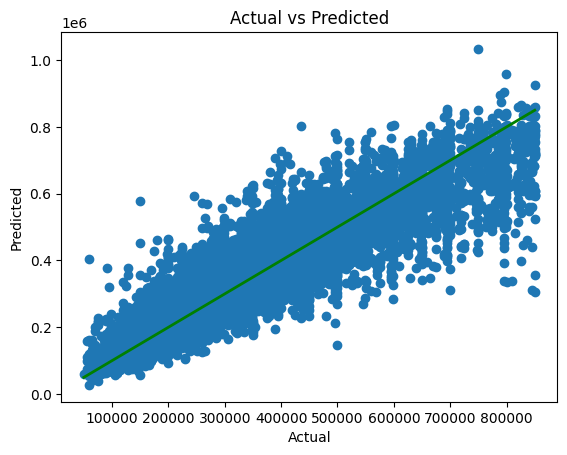

In [19]:
plt.scatter(y_test_g, y_test_pred )
plt.plot([y_test_g.min(), y_test_g.max()], [y_test_g.min(), y_test_g.max()], c='g', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

### Residuals

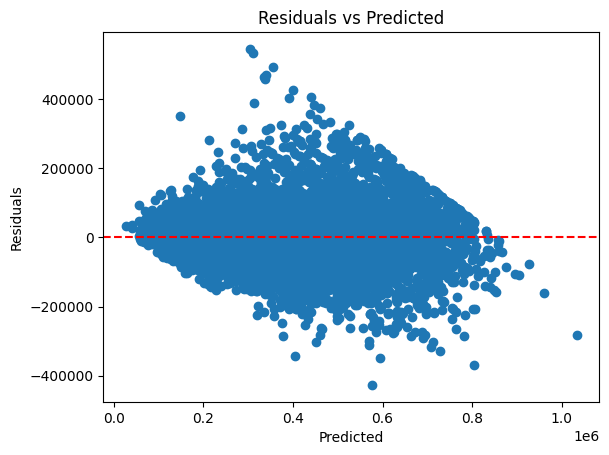

In [20]:
residuals_g= y_test_g - y_test_pred 

plt.scatter(y_test_pred , residuals_g)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.show()

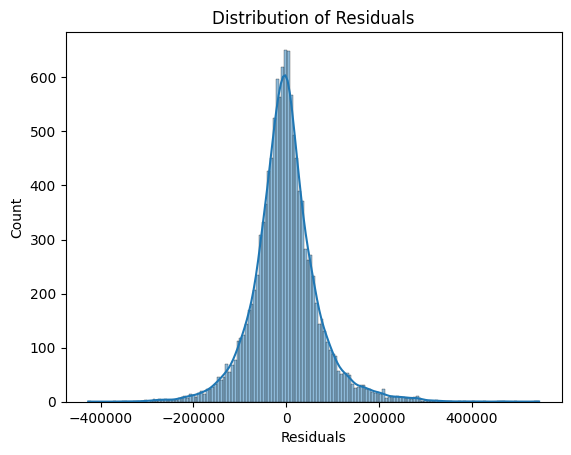

In [21]:
sns.histplot(residuals_g, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.show()

#### Features Importance

In [17]:
feature_names = X_train_scaled.columns.tolist()

In [18]:
importances = xgb_r.feature_importances_
feature_importance_xg = pd.Series(importances, index=feature_names).sort_values(ascending=False)

print("XGBoost Feature Importances:")
print(feature_importance_xg)

XGBoost Feature Importances:
postCode_8300        0.049130
province_Hainaut     0.042796
province_Brussels    0.039214
province_Liège       0.035776
province_Namur       0.025060
                       ...   
postCode_6441        0.000000
postCode_6531        0.000000
postCode_6461        0.000000
postCode_6593        0.000000
type_HOUSE           0.000000
Length: 1162, dtype: float32
